# 1 and 2: Preparation and Data Set

In [29]:
# Description: An array of possible binary inputs is given. 
#              Moreover, the targets of the different logical gates (and, or, nand, nor and xor) are defined.
#              Additionally, functions for the activation function (sigmoid) and it's derivative (sigmoidprime)
#              are defined.

import numpy as np 

inputs = np.array([[0,0],[0,1],[1,0],[1,1]])

target_and = np.array([0,0,0,1])
target_or = np.array([0,1,1,1])
target_nand = np.array([1,1,1,0])
target_nor = np.array([1,0,0,0])
target_xor = np.array([0,1,1,0])

def sigmoid(x): 
    return (1 / (1 + np.exp(-x)))

def sigmoidprime(x):
    return (sigmoid(x) * (1 - sigmoid(x)))

# 3: Perceptron class

In [30]:
# Description: The class Perceptron describes the behavior of a single neuron, therefore it includes:
#              @init parameters: input_units
#              @class variables: -
#              @object variables: _input_units, _weights, _bias, _alpha, _drive, _activations_previous_layer
#              @functions: forward_step, update, _get_drive, _get_weights

class Perceptron:
    
    def __init__(self, input_units):
        self._input_units = input_units
        self._weights = np.random.randn(input_units)
        self._bias = np.random.randn()
        self._alpha = 1
        self._drive = 0
        
        # Array to save the activations of the previous layer (In case of the first hidden layer the inputs of the MLP). 
        self._activations_previous_layer = np.empty(input_units)
 

    # Description: This function conducts one forward step of the perceptron. 
    #              Therefore it computes the output with the activation function sigmoid depending on the drive. 
    #              Moreover, the inputs are saved in the object variable _activations_previous_layer, because 
    #              they are needed for the backpropagation later on.
    #              @parameters: inputs
    def forward_step(self, inputs):
        self._activations_previous_layer = inputs
        self._drive = np.dot(inputs, self._weights) + self._bias 
        activation = sigmoid(self._drive)
        return activation             
 

    # Description: This function updates the weights and the bias of the perceptron.
    #              @parameters: delta
    def update(self, delta):
        self._weights -= self._alpha * delta * self._activations_previous_layer
        self._bias -= self._alpha * delta * 1
 
    def _get_drive(self):
        return self._drive
         
    def _get_weights(self):
        return self._weights

# 4: Multi-Layer Perceptron class

In [31]:
# Description: The class MLP describes a multi-layer perceptron with one hidden layer and one output perceptron.
#              @init parameters: input_units, size_hidden_layer
#              @class variables: -
#              @object variables: _size_hidden_layer, _hidden_layer[], _output_layer
#              @functions: forward_step, backprop_step

class MLP:
    
    def __init__(self, input_units, size_hidden_layer):
        self._size_hidden_layer = size_hidden_layer
        
        self._hidden_layer = [None for i in range(size_hidden_layer)]
        for i in range(len(self._hidden_layer)):
            self._hidden_layer[i] = Perceptron(input_units)
        
        self._output_layer = Perceptron(size_hidden_layer)

        
    # Description: This function conducts one forward step of the MLP. 
    #              Therefore it computes firstly the activations of the perceptrons in the hidden layer and 
    #              secondly the activation of the output layer which is the overall prediction of the MLP.
    #              @parameters: inputs
    def forward_step(self, inputs): 
        activations_hidden_layer = np.empty(self._size_hidden_layer)
        for i in range(len(activations_hidden_layer)):
            activations_hidden_layer[i] = self._hidden_layer[i].forward_step(inputs)
            
        prediction = self._output_layer.forward_step(activations_hidden_layer)
        return prediction
 

    # Description: This function conducts the backpropagation of the MLP. 
    #              Therefore it computes the delta of the output layer and the deltas of the perceptrons 
    #              in the hidden layer. Afterwards it updates every perceptron of the MLP.
    #              @parameters: derivative_loss
    def backprop_step(self, derivative_loss):
        delta_output_layer = derivative_loss * sigmoidprime(self._output_layer._get_drive())
        
        # Computes firstly the derivative for every weight which comes from the hidden layer and ends in the 
        # output layer and secondly based on that the deltas of the perceptrons in the hidden layer.
        derivatives_weights_hl_ol = delta_output_layer * self._output_layer._get_weights()
        deltas_hidden_layer = np.empty(self._size_hidden_layer)
        for i in range(len(deltas_hidden_layer)):             
            deltas_hidden_layer[i] = derivatives_weights_hl_ol[i] * sigmoidprime(self._hidden_layer[i]._get_drive())
        
        self._output_layer.update(delta_output_layer) 
        
        # Updates the hidden layer in a seperate for-loop to keep chronological order of backpropagation.
        for i in range(len(self._hidden_layer)):
            self._hidden_layer[i].update(deltas_hidden_layer[i])

# 5: Training

In [32]:
# Description: The following steps create and train a MLP with a hidden layer consisting of 4 perceptrons.
#              The logical gate which should be learned is chosen by defining the target array.
#              A training loop trains the MLP and determines it's accuracy and loss.

target = target_and    

size_hidden_layer = 4
n_inputs_per_training_step = 2
logical_gate = MLP(n_inputs_per_training_step, size_hidden_layer)

amount_of_training_epochs = 1000

steps = np.empty(amount_of_training_epochs)
average_accuracy_each_epoch = np.empty(amount_of_training_epochs)
average_loss_each_epoch = np.empty(amount_of_training_epochs)

# Training Loop:
for epoch in range(amount_of_training_epochs):
    steps[epoch] = epoch
    correct_predictions_current_epoch = 0
    loss_current_epoch = 0
    
    for i in range(len(inputs)):
        prediction = logical_gate.forward_step(inputs[i])
    
        # Increments the correct predictions count if prediction is correct.
        if (prediction <= 0.5 and target[i] == 0) or (prediction > 0.5 and target[i] == 1):
            correct_predictions_current_epoch += 1
    
        # Computes the loss and conducts backpropagation.
        loss_current_epoch += np.square(target[i] - prediction)    
        derivative_loss = -2 * (target[i] - prediction)
    
        logical_gate.backprop_step(derivative_loss)
    
    # Updates accuracy and loss arrays.
    average_accuracy_each_epoch[epoch] = correct_predictions_current_epoch / len(inputs)
    average_loss_each_epoch[epoch] = loss_current_epoch / len(inputs) 

# 6: Visualization

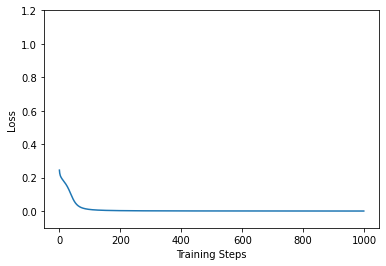

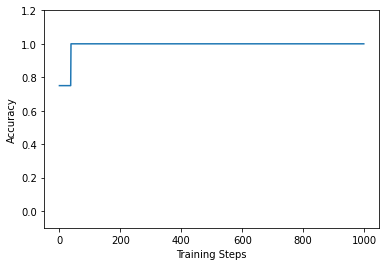

In [33]:
# Description: Figure 1 shows the average loss during the training.
#              Figure 2 shows the average accuracy during the training.

import matplotlib.pyplot as plt

plt.figure()
plt.plot(steps, average_loss_each_epoch)
plt.xlabel("Training Steps")
plt.ylabel("Loss")
plt.ylim([-0.1, 1.2])
plt.show()

plt.figure()
plt.plot(steps, average_accuracy_each_epoch)
plt.xlabel("Training Steps")
plt.ylabel("Accuracy")
plt.ylim([-0.1, 1.2])
plt.show()